# CS 524

HW5 Sparsh Agarwal 9075905142

Q1.(a)

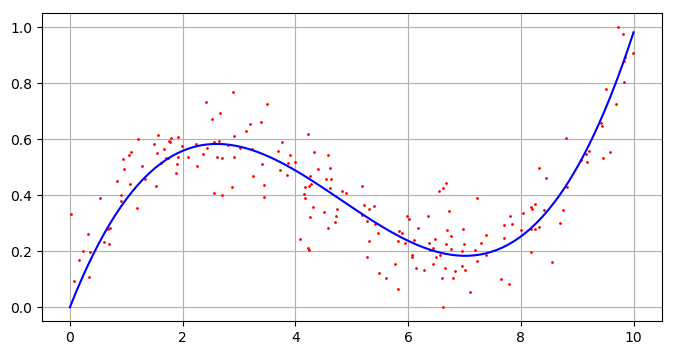

Academic license - for non-commercial use only
Optimal


In [30]:
using JuMP, Gurobi, PyPlot

raw = readcsv("xy_data.csv");
x = raw[:,1];
y = raw[:,2];

# order of polynomial to use
k = 3

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

# NOTE: must have either Gurobi or Mosek installed!


#m = Model(solver=MosekSolver(LOG=0))
m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=GurobiSolver(OutputFlag=1,NumericFocus=2))    # extra option to do extra numerical conditioning
#m = Model(solver=GurobiSolver(OutputFlag=1,BarHomogeneous=1))  # extra option to use alternative algorithms

@variable(m, u[1:k+1])
@constraint(m, u[k+1] == 0)
@objective(m, Min, sum( (y - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
# print(zero'*u)

npts = 100
xfine = linspace(0,10,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(8,4))
plot( x, y, "r.", markersize=2)
plot( xfine, yfine, "b-")
# axis([0,10,-0.25,1.25])
grid()

Q1. (b)

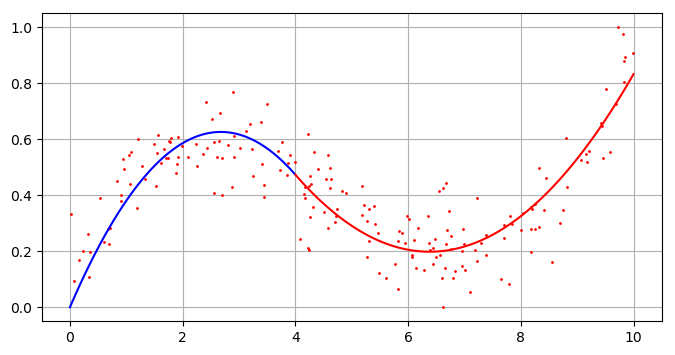

Academic license - for non-commercial use only
Optimal


In [50]:
using JuMP, Gurobi, PyPlot

raw = readcsv("xy_data.csv");
x, y = raw[:, 1], raw[:, 2]
xl, xr = x[x .< 4], x[x .>= 4]
yl, yr = y[x .< 4], y[x .>= 4]

# order of polynomial to use
k = 2

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
nl = length(xl)
nr = length(xr)
Ap = zeros(nl,k+1)
Aq = zeros(nr,k+1)
for i = 1:nl
    for j = 1:k+1
        Ap[i,j] = xl[i]^(k+1-j);
    end
end
for i = 1:nr
    for j = 1:k+1
        Aq[i,j] = xr[i]^(k+1-j);
    end
end

# NOTE: must have either Gurobi or Mosek installed!


#m = Model(solver=MosekSolver(LOG=0))
m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=GurobiSolver(OutputFlag=1,NumericFocus=2))    # extra option to do extra numerical conditioning
#m = Model(solver=GurobiSolver(OutputFlag=1,BarHomogeneous=1))  # extra option to use alternative algorithms

@variable(m, p[1:k+1])
@variable(m, q[1:k+1])

@constraint(m, p[k+1] == 0)
@constraint(m, [16 4 1]*p .== [16 4 1]*q)
@constraint(m, [8 1 0]*p .== [8 1 0]*q)
@objective(m, Min, sum( (yl - Ap*p).^2 ) + sum( (yr - Aq*q).^2 ) )

status = solve(m)
popt = getvalue(p)
qopt = getvalue(q)
println(status)
# print(zero'*u)

npts = 100
xlfine = linspace(0,4,npts)
xrfine = linspace(4,10,npts)
lffine = ones(npts)
rffine = ones(npts)
for j = 1:k
    lffine = [lffine.*xlfine ones(npts)]
end
for j = 1:k
    rffine = [rffine.*xrfine ones(npts)]
end
ypfine = lffine * popt
yqfine = rffine * qopt
figure(figsize=(8,4))
plot( x, y, "r.", markersize=2)
plot( xlfine, ypfine, "b-")
plot( xrfine, yqfine, "r-")
# axis([0,10,-0.25,1.25])
grid()

Q2. (a)

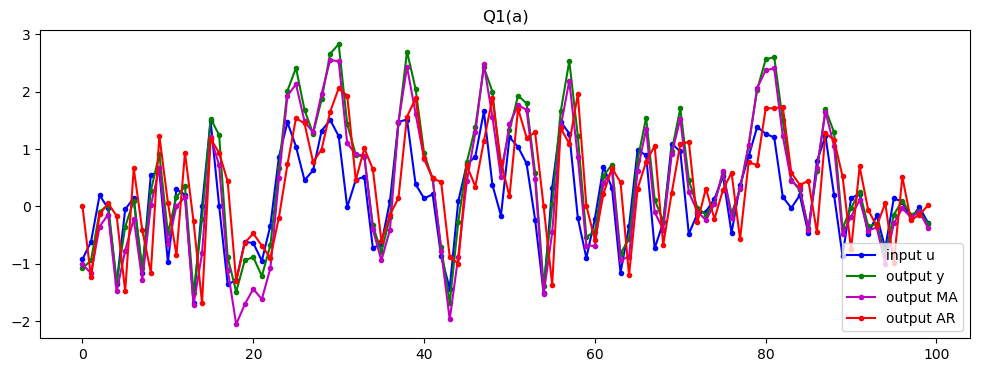


MA Error : 2.460854388269911
AR Error : 7.436691765656793


In [13]:
using PyPlot

raw = readcsv("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

width = 5

AMA = zeros(T,width)
for i = 1:width
    AMA[i:end,i] = u[1:end-i+1]
end
woptMA = AMA\y
yestMA = AMA*woptMA

AAR = zeros(T,width)
for i = 1:width
    AAR[i+1:end,i] = y[1:end-i]
end
woptAR = AAR\y
yestAR = AAR*woptAR

figure(figsize=(12,4))
plot(u,"b.-",y,"g.-",yestMA,"m.-",yestAR,"r.-");
legend(["input u", "output y", "output MA", "output AR"], loc="lower right");
title("Q1(a)");
println()
println("MA Error : ", norm(yestMA-y))
println("AR Error : ", norm(yestAR-y))

Q2. (b)

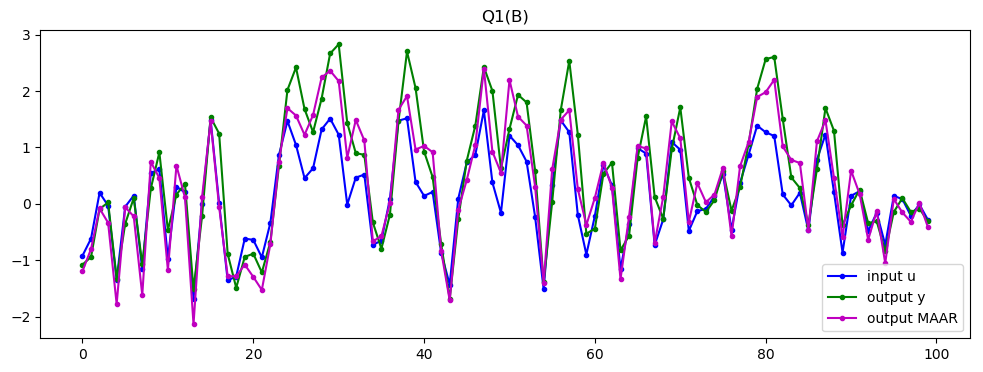


ARMA Error : 4.575225999197418


In [14]:
using PyPlot

raw = readcsv("uy_data.csv");
u = raw[:,1];
y = raw[:,2];
T = length(u)

widthMA = 1
widthAR = 1

AARMA = zeros(T,width)
for i = 1:widthMA
    AARMA[i:end,i] = u[1:end-i+1]
end
for i = widthMA+1:widthAR+widthMA
    AARMA[i+1:end,i] = y[1:end-i]
end
woptARMA = AARMA\y
yestARMA = AARMA*woptARMA

figure(figsize=(12,4))
plot(u,"b.-",y,"g.-",yestARMA,"m.-");
legend(["input u", "output y", "output MAAR"], loc="lower right");
title("Q1(B)");
println()
println("ARMA Error : ", norm(yestARMA-y))

Q3.(a)

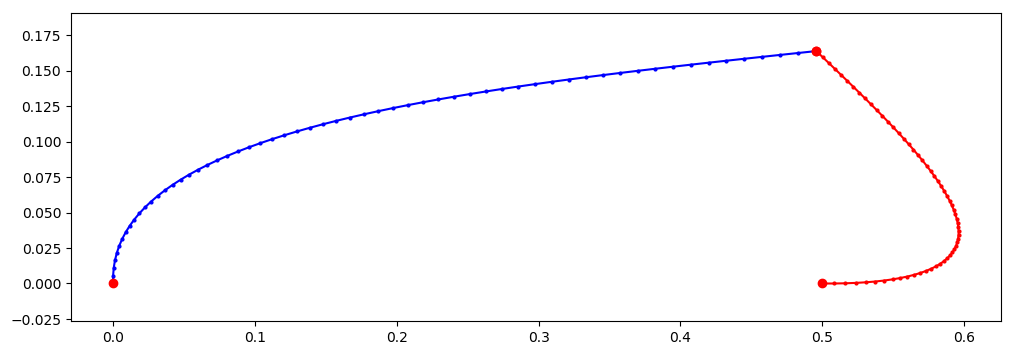

Academic license - for non-commercial use only


In [9]:
using JuMP, PyPlot
# using Mosek
using Gurobi

k = 60             # number of waypoints
T = zeros(Int,k)   # vector of timepoints

for i = 1:k
    T[i] = i
end

# m = Model(solver = MosekSolver(LOG=0))
m = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m, xA[1:2,1:k])  # resulting position
@variable(m, vA[1:2,1:k])  # resulting velocity
@variable(m, uA[1:2,1:k])  # thruster input
@variable(m, xB[1:2,1:k])  # resulting position
@variable(m, vB[1:2,1:k])  # resulting velocity
@variable(m, uB[1:2,1:k])  # thruster input

@constraint(m, vA[:,1] .== [0;20])
@constraint(m, vB[:,1] .== [30;0])
@constraint(m, xA[:,1] .== [0;0])
@constraint(m, xB[:,1] .== [0.5;0])
@constraint(m, xB[:,60] .== xA[:,60])

for t in 1:k-1
    @constraint(m, xA[:,t+1] .== xA[:,t] + vA[:,t]/3600)
    @constraint(m, vA[:,t+1] .== vA[:,t] + uA[:,t])
    @constraint(m, xB[:,t+1] .== xB[:,t] + vB[:,t]/3600)
    @constraint(m, vB[:,t+1] .== vB[:,t] + uB[:,t])
end

@objective(m, Min, sum(uA.^2) + sum(uB.^2) )
solve(m)

figure(figsize=(12,4))
plot( getvalue(xA[1,:]), getvalue(xA[2,:]), "b.-", markersize=4 )
plot( getvalue(xB[1,:]), getvalue(xB[2,:]), "r.-", markersize=4 )
plot( getvalue(xA[1,1]), getvalue(xA[2,1]), "r.", markersize=12 )
plot( getvalue(xB[1,1]), getvalue(xB[2,1]), "r.", markersize=12 )
plot( getvalue(xA[1,60]), getvalue(xA[2,60]), "r.", markersize=12 )
plot( getvalue(xB[1,60]), getvalue(xB[2,60]), "r.", markersize=12 )
axis("equal")

Q3. (b)Yes, the optimal rendezvous point is different when velocity sync is required than in prevous part, as in that part their velocities would not align.

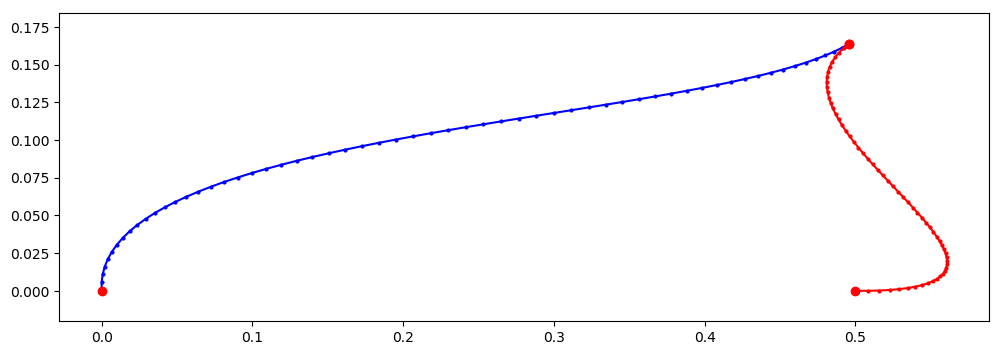

Academic license - for non-commercial use only


(-0.028043054743814567, 0.5889041496201058, -0.00819444444444444, 0.17208333333333325)

In [10]:
using JuMP, PyPlot
# using Mosek
using Gurobi

k = 60             # number of waypoints
T = zeros(Int,k)   # vector of timepoints

for i = 1:k
    T[i] = i
end

# m = Model(solver = MosekSolver(LOG=0))
m = Model(solver = GurobiSolver(OutputFlag=0))

@variable(m, xA[1:2,1:k])  # resulting position
@variable(m, vA[1:2,1:k])  # resulting velocity
@variable(m, uA[1:2,1:k])  # thruster input
@variable(m, xB[1:2,1:k])  # resulting position
@variable(m, vB[1:2,1:k])  # resulting velocity
@variable(m, uB[1:2,1:k])  # thruster input

@constraint(m, vA[:,1] .== [0;20])
@constraint(m, vB[:,1] .== [30;0])
@constraint(m, xA[:,1] .== [0;0])
@constraint(m, xB[:,1] .== [0.5;0])
@constraint(m, xB[:,60] .== xA[:,60])
@constraint(m, vB[:,60] .== vA[:,60])

for t in 1:k-1
    @constraint(m, xA[:,t+1] .== xA[:,t] + vA[:,t]/3600)
    @constraint(m, vA[:,t+1] .== vA[:,t] + uA[:,t])
    @constraint(m, xB[:,t+1] .== xB[:,t] + vB[:,t]/3600)
    @constraint(m, vB[:,t+1] .== vB[:,t] + uB[:,t])
end

@objective(m, Min, sum(uA.^2) + sum(uB.^2) )
solve(m)

figure(figsize=(12,4))
plot( getvalue(xA[1,:]), getvalue(xA[2,:]), "b.-", markersize=4 )
plot( getvalue(xB[1,:]), getvalue(xB[2,:]), "r.-", markersize=4 )
plot( getvalue(xA[1,1]), getvalue(xA[2,1]), "r.", markersize=12 )
plot( getvalue(xB[1,1]), getvalue(xB[2,1]), "r.", markersize=12 )
plot( getvalue(xA[1,60]), getvalue(xA[2,60]), "r.", markersize=12 )
plot( getvalue(xB[1,60]), getvalue(xB[2,60]), "r.", markersize=12 )
axis("equal")